## Importing libraries

In [ ]:
%pip install powerlaw

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy.stats import lognorm

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [10]:
df = pd.read_csv('backward all.csv')
df.head(10)

,Max Citation Per Record,Total
0,IN296620A1 | IL-1A ABS AND METHODS OF USE | XB...,NaN
1,IN-DELNP-2010-09108A | IL-1A ABS AND METHODS O...,644.0
2,IN359661A1 | CYTOTOXIC BENZODIAZEPINE DERIVATI...,644.0
3,IN201717008119A | CYTOTOXIC BENZODIAZEPINE DER...,152.0
4,IN332161A1 | METHOD FOR ENTROPY ENCODING SLICE...,152.0
5,IN-MUMNP-2015-01889A | METHOD FOR ENTROPY ENCO...,101.0
6,IN408499A1 | IMAGE ENCODING/DECODING METHOD AN...,101.0
7,IN202117015912A | IMAGE ENCODING/DECODING METH...,27.0
8,IN398931A1 | ULTRA HIGH DENSITY CELL BANKING M...,27.0
9,IN201737013379A | ULTRA HIGH DENSITY CELL BANK...,16.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Max Citation Per Record  20 non-null     object 
 1   Total                    19 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [12]:
df.isnull()

,Max Citation Per Record,Total
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [13]:
# Replace NaN values with zero
df.fillna(0, inplace=True)

## Display

### Emperical distribution

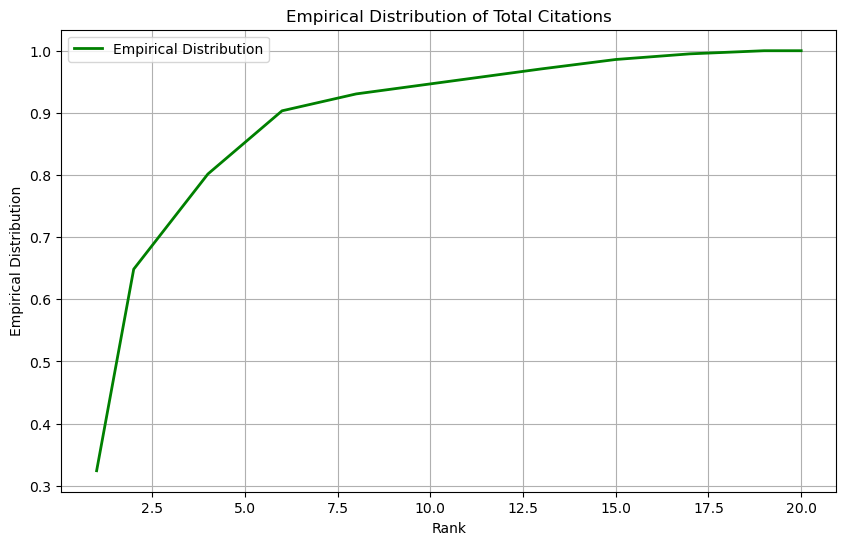

In [14]:
# Extract and sort citation counts in descending order
total_citations = df['Total']
total_citations_sorted = total_citations.sort_values(ascending=False)

# Calculate ranks and empirical distribution
ranks = np.arange(1, len(total_citations_sorted) + 1)
empirical_distribution = total_citations_sorted.cumsum() / total_citations_sorted.sum()

# Combine ranks and empirical distribution into a DataFrame
empirical_data = pd.DataFrame({'Rank': ranks, 'Empirical Distribution': empirical_distribution})

# Step 5: Plot the empirical distribution
plt.figure(figsize=(10, 6))
plt.plot(empirical_data['Rank'], empirical_data['Empirical Distribution'], 'g-', lw=2, label='Empirical Distribution')
plt.xlabel('Rank')
plt.ylabel('Empirical Distribution')
plt.title('Empirical Distribution of Total Citations')
plt.legend()
plt.grid(True)
plt.show()


### Lognormal fit

c:\Users\adith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\adith\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1997: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)


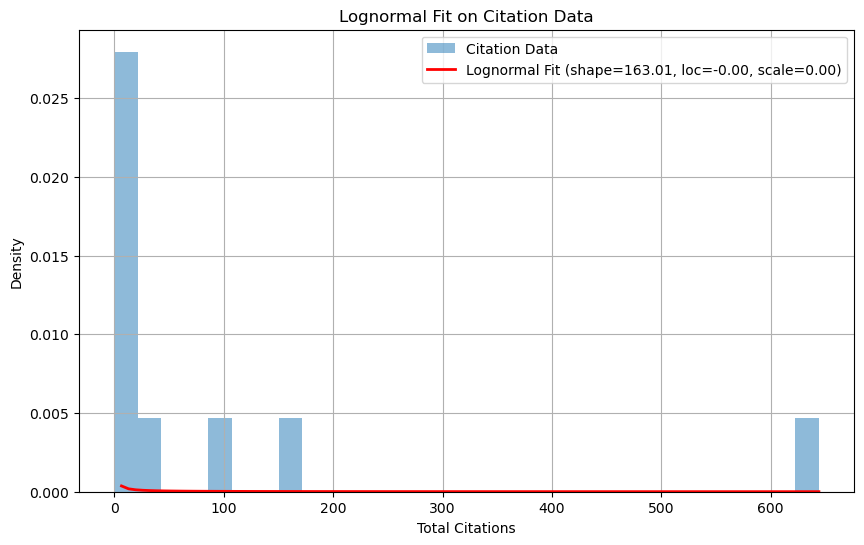

In [15]:
# Extract the 'Total' column (citation counts)
total_citations = df['Total']

# Fit a lognormal distribution to the citation data
shape, loc, scale = lognorm.fit(total_citations)

# Generate x values for plotting
x = np.linspace(min(total_citations), max(total_citations), 100)

# Calculate the PDF of the fitted lognormal distribution
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot the histogram and lognormal fit
plt.figure(figsize=(10, 6))
plt.hist(total_citations, bins=30, density=True, alpha=0.5, label='Citation Data')
plt.plot(x, pdf, 'r-', lw=2, label=f'Lognormal Fit (shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f})')

# Add labels and title
plt.xlabel('Total Citations')
plt.ylabel('Density')
plt.title('Lognormal Fit on Citation Data')
plt.legend()
plt.grid(True)
plt.show()


### Power law fit

C:\Users\adith\AppData\Local\Temp\ipykernel_20700\707382574.py:12: RuntimeWarning: divide by zero encountered in log10
  log_citations = np.log10(total_citations_sorted)


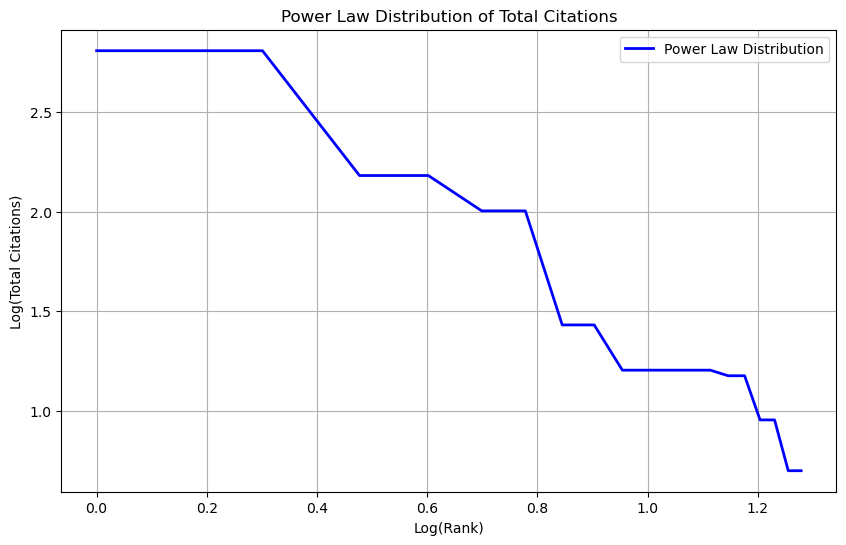

In [16]:

# Extract citation counts
total_citations = df['Total']

# Sort citation counts in descending order
total_citations_sorted = np.sort(total_citations)[::-1]

# Calculate ranks for each citation count
ranks = np.arange(1, len(total_citations_sorted) + 1)

# Log-transform the ranks and citation counts
log_ranks = np.log10(ranks)
log_citations = np.log10(total_citations_sorted)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(log_ranks, log_citations, 'b-', lw=2, label='Power Law Distribution')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Total Citations)')
plt.title('Power Law Distribution of Total Citations')
plt.legend()
plt.grid(True)
plt.show()


### Pareto distribution

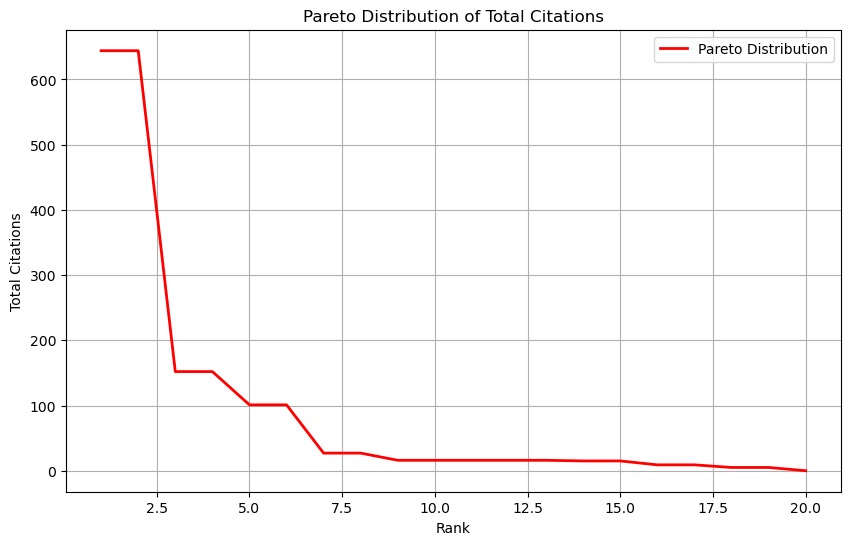

In [17]:
# Extract citation counts
total_citations = df['Total']

# Sort citations in descending order
total_citations_sorted = np.sort(total_citations)[::-1]


# Create Pareto plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(total_citations_sorted) + 1), total_citations_sorted, 'r-', lw=2, label='Pareto Distribution')
plt.xlabel('Rank')
plt.ylabel('Total Citations')
plt.title('Pareto Distribution of Total Citations')
plt.legend()
plt.grid(True)
plt.show()